In [1]:
import torch
import torch.nn as nn

from utils import HParams, get_data, show_example
from train import train_cycle
from test import test_cycle
import baseline_models
import packed_models

In [2]:
hparams = HParams()
train_loader, val_loader = get_data(batch_size=hparams.batch_size, data_transforms=hparams.data_transforms)

Files already downloaded and verified
Files already downloaded and verified


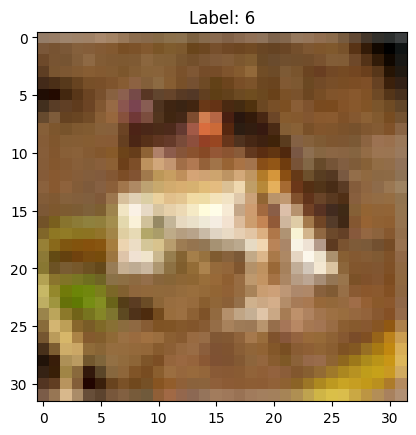

In [7]:
show_example(train_loader, 0)

In [7]:
# limit = 1024

# train_loader.dataset.data = train_loader.dataset.data[:limit]
# train_loader.dataset.targets = train_loader.dataset.targets[:limit]

In [10]:
baseline_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
baseline_model.fc = nn.Linear(512, 10)

packed_model = packed_models.PackedResNet18(alpha=2, gamma=2, n_estimators=4)
baseline_model_scratch = baseline_models.ResNet18()

Using cache found in /home/tomas/.cache/torch/hub/pytorch_vision_v0.10.0
/home/tomas/.virtualenvs/snek/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tomas/.virtualenvs/snek/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [11]:
# train_cycle(packed_model)

In [12]:
train_cycle(baseline_model, hparams, train_loader, val_loader)

Epoch: 1/75 | Loss: 1.7363 | Accuracy: 45.72%
Epoch: 2/75 | Loss: 1.0059 | Accuracy: 56.37%
Epoch: 3/75 | Loss: 0.9875 | Accuracy: 59.19%
Epoch: 4/75 | Loss: 0.6680 | Accuracy: 67.76%
Epoch: 5/75 | Loss: 1.1749 | Accuracy: 62.23%
Epoch: 6/75 | Loss: 0.8852 | Accuracy: 67.82%
Epoch: 7/75 | Loss: 0.6562 | Accuracy: 60.22%
Epoch: 8/75 | Loss: 0.6187 | Accuracy: 66.09%
Epoch: 9/75 | Loss: 0.6342 | Accuracy: 72.54%
Epoch: 10/75 | Loss: 0.7090 | Accuracy: 71.92%
Epoch: 11/75 | Loss: 0.6346 | Accuracy: 72.37%
Epoch: 12/75 | Loss: 0.6014 | Accuracy: 69.57%
Epoch: 13/75 | Loss: 0.2794 | Accuracy: 71.96%
Epoch: 14/75 | Loss: 0.4970 | Accuracy: 64.48%
Epoch: 15/75 | Loss: 0.3188 | Accuracy: 72.84%
Epoch: 16/75 | Loss: 0.4637 | Accuracy: 74.45%
Epoch: 17/75 | Loss: 0.5043 | Accuracy: 70.31%
Epoch: 18/75 | Loss: 0.5392 | Accuracy: 69.86%
Epoch: 19/75 | Loss: 0.4418 | Accuracy: 75.54%
Epoch: 20/75 | Loss: 0.4792 | Accuracy: 71.00%
Epoch: 21/75 | Loss: 0.5223 | Accuracy: 71.83%
Epoch: 22/75 | Loss: 0

In [13]:
acc, ece, aupr, auc = test_cycle(baseline_model, val_loader)
print(f'Baseline Model:')
print(f'\tAcc: {acc}')
print(f'\tECE: {ece}')
print(f'\tAUPR: {aupr}')
print(f'\tAUC: {auc}')
# print(f'\tFPR95: {fpr95}')

Baseline Model:
	Acc: 0.8183000087738037
	ECE: 0.13695426285266876
	AUPR: 0.9750760793685913
	AUC: 0.9750760793685913
